In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib as mpl
from scipy import stats
import numpy_indexed as npi 
import glob, os
from mpl_toolkits.mplot3d import Axes3D
import emcee
from scipy import interpolate
import warnings
from scipy import stats
from scipy.interpolate import interp1d
warnings.filterwarnings("ignore")
plt.style.use('my')
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1069: UserWarning: Bad val "$TEMPLATE_BACKEND" on line #41
	"backend      : $TEMPLATE_BACKEND
"
	in file "/Applications/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle"
	Key backend: Unrecognized backend string "$template_backend": valid strings are [u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']
  (val, error_details, msg))


In [3]:
# high resolution
a=np.genfromtxt('../loc/blr.con_H7-14_phi17-24_col23_metal2_grid0.125',usecols=[0,6,1])
print a.shape

(26732772, 3)


In [156]:

mgii_ew=[]
ha_ew=[]
hb_ew=[]
mgii_f=[]
ha_f=[]
hb_f=[]
l3000=[]
F3000=[]
F1216=[]
U=[]
I=[]

#line base width 28,32,44 A
#flux=np.zeros(8228)
flux=[]
c=0
for i in np.arange(7,14.125,0.125):
    for j in np.arange(17,24.125,0.125):
        #print np.round(i,2)
        n=8228
        n0=0
        n0=n0+n*c
        n=n+n*c
        c=c+1
        U.append(np.round(j-i-10.5,2))
        I.append(i)
        #if (i >11) & (i < 11.2) & (j ==18.) :
            #plt.plot(a[n0:n,0],np.log10(a[n0:n,1]/a[n0:n,0]),'k',lw=1,alpha=0.5)

        f3000=(a[n0:n,2]/a[n0:n,0])[5526]
        F3000.append(f3000)
        f1216=(a[n0:n,2]/a[n0:n,0])[5798]
        F1216.append((a[n0:n,2]/a[n0:n,0])[5798])
       
        ha_f.append( ((a[n0:n,1]/a[n0:n,0])[5291]-(a[n0:n,1]/a[n0:n,0])[5290])*22 )
        hb_f.append( ((a[n0:n,1]/a[n0:n,0])[5381]-(a[n0:n,1]/a[n0:n,0])[5380])*16 )
        mgii_f.append( ((a[n0:n,1]/a[n0:n,0])[5547]-(a[n0:n,1]/a[n0:n,0])[5545])*14 )

        ha_ew.append( ((a[n0:n,1]/a[n0:n,0])[5291]-(a[n0:n,1]/a[n0:n,0])[5292])*22/f1216 )
        hb_ew.append( ((a[n0:n,1]/a[n0:n,0])[5381]-(a[n0:n,1]/a[n0:n,0])[5382])*16/f1216 )
        mgii_ew.append( ((a[n0:n,1]/a[n0:n,0])[5547]-(a[n0:n,1]/a[n0:n,0])[5548])*14/f1216 )
        
       
        
l3000=np.array(l3000)
F3000=np.array(F3000)
F1216=np.array(F1216)
ha_f=np.array(ha_f)
hb_f=np.array(hb_f)
mgii_f=np.array(mgii_f)
ha_ew=np.array(ha_ew)
hb_ew=np.array(hb_ew)
mgii_ew=np.array(mgii_ew)
U=np.array(U)
I=np.array(I)
flux=np.array(flux)


'''
data=np.genfromtxt('../loc/blr.line_H7-14_phi17-24_col23_metal2_grid0.125',usecols=[2,3,4,5])
mgii_f=data[:,2]#+data[:,3]
hb_f=data[:,0]
ha_f=data[:,1]
mgii_ew=mgii_f/F1216
hb_ew=hb_f/F1216
ha_ew=ha_f/F1216
'''


"\ndata=np.genfromtxt('../loc/blr.line_H7-14_phi17-24_col23_metal2_grid0.125',usecols=[2,3,4,5])\nmgii_f=data[:,2]#+data[:,3]\nhb_f=data[:,0]\nha_f=data[:,1]\nmgii_ew=mgii_f/F1216\nhb_ew=hb_f/F1216\nha_ew=ha_f/F1216\n"

nan


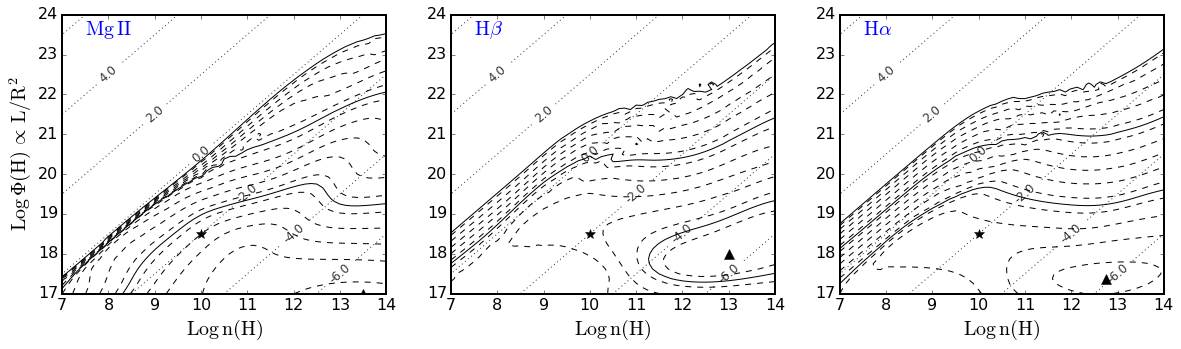

In [171]:
X,Y = np.mgrid[7:14.125:0.125,17:24.125:0.125]
#X1,Y1 = np.mgrid[7:14.5:0.5,17:24.5:0.5]
U=Y1-X1-10.5

plt.figure(figsize=(18,5))
plt.subplots_adjust(left=0.05,right=0.9)
plt.style.use('my')
plt.subplot(131)
indm=mgii_ew.argmax()
Z=np.log10((mgii_ew.reshape(57,57)))
print np.log10(mgii_ew).max()

cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.,1.,2.,3.],colors='k',linewidths=1)
plt.xlabel(r'$\rm Log\,n(H)$')
plt.ylabel(r'$\rm Log\,\Phi(H)\,\propto\,L/R^{2}$')
plt.text(7.5,23.5,r'$\rm Mg\,II$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')

plt.subplot(132)
indm=hb_ew.argmax()
Z=np.log10((hb_ew.reshape(57,57)))
cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, inline=1, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.,1.,2.,3],colors='k',linewidths=1)

plt.xlabel(r'$\rm Log\,n(H)$')
plt.text(7.5,23.5,r'$\rm H\beta$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')

plt.subplot(133)
indm=ha_ew.argmax()
Z=np.log10((ha_ew.reshape(57,57)))
cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, inline=1, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,3,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.,1.,2.],colors='k',linewidths=1)
#plt.ylabel(r'$\rm Log\,\Phi(H)$')
plt.xlabel(r'$\rm Log\,n(H)$')
plt.text(7.5,23.5,r'$\rm H\alpha$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')
#plt.savefig('../paper_fig/LOC.pdf')
#plt.savefig('/Users/legolason/Desktop/CL_mgII/LOC.pdf')

(3249, 4)


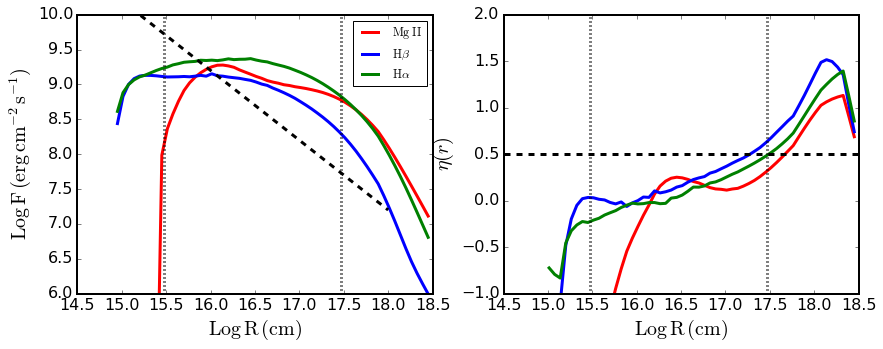

In [363]:
data=np.genfromtxt('../loc/blr.line_H7-14_phi17-24_col23_metal2_grid0.125',usecols=[2,3,4,5])
print data.shape

mgii_f=(data[:,2]+data[:,3])
hb_f=data[:,0]
ha_f=data[:,1]
#civ_f=data[:,5]


mgii_R=[]
hb_R=[]
ha_R=[]
#civ_R=[]
#F1216_R=[]
nn=57
X,Y=np.mgrid[7:14.125:0.125,17:24.125:0.125]


n1,n2=9,41#8-12
for i in range(nn):
    ind = np.where( ((Y.flatten()[i::nn][n1:n2]-X.flatten()[i::nn][n1:n2]) <= 12.) &
                  ((Y.flatten()[i::nn][n1:n2]-X.flatten()[i::nn][n1:n2]) > 6) , True,False)
    mgii_R.append( mgii_f[i::nn][n1:n2][ind].sum())
    #F1216_R.append( F1216[i::nn][n1:n2][ind].sum())
    hb_R.append( hb_f[i::nn][n1:n2][ind].sum())
    ha_R.append( ha_f[i::nn][n1:n2][ind].sum())
    #civ_R.append( civ_f[i::nn][n1:n2][ind].sum() )
    
mgii_R=np.array(mgii_R)
hb_R=np.array(hb_R)
ha_R=np.array(ha_R)
#civ_R=np.array(civ_R )
#F1216_R=np.array(F1216_R)


plt.figure(figsize=(14,5))
plt.subplot(121)

QH=1.e55
R=np.sqrt(QH/12.56/10**np.arange(17,24.125,0.125))
plt.plot(np.log10(R),np.log10(mgii_R),'r',label=r'$\rm Mg\;II$')
plt.plot(np.log10(R),np.log10(hb_R),'b',label=r'$\rm H\beta$')
plt.plot(np.log10(R),np.log10(ha_R),'g',label=r'$\rm H\alpha$')
#plt.plot(np.log10(R),np.log10(civ_R),'c',label=r'$\rm C\;IV$')
#plt.plot(np.log10(R),np.log10(F1216_R),'k',label=r'$\rm Cont $')

#plt.xlim(15.,18)
plt.ylabel(r'$\rm Log\, F\, (erg\,cm^{-2}\,s^{-1})$')
plt.xlabel(r'$\rm Log\,R\,(cm)$')
plt.legend()
plt.ylim(6,10)

Rout=17.47
plt.plot([Rout,Rout],[0,10],'k:')
Rout=15.47
plt.plot([Rout,Rout],[0,10],'k:')
plt.plot([15,18],[10.2,7.2],'k--')


Lmgii=np.log10(np.sum(10**(np.log10(R[:45])*2+np.log10(mgii_R)[:45])))
#L1216=np.log10(np.sum(10**(np.log10(R[:45])*2+np.log10(F1216_R)[:45])))
#C=0.5
#print 'EW' , (10**Lmgii*C)/(10**L1216)


x1=np.linspace(15,18.5)

#plt.plot(x1,-x1+25,'k')

plt.subplot(122)
eta_mgii=[]
eta_hb=[]
eta_ha=[]
for i in range(56):
    eta_mgii.append(-0.5*(np.log10(mgii_R[i])-np.log10(mgii_R[i+1]))/(np.log10(R[i])-np.log10(R[i+1])))
    eta_hb.append(-0.5*(np.log10(hb_R[i])-np.log10(hb_R[i+1]))/(np.log10(R[i])-np.log10(R[i+1])))
    eta_ha.append(-0.5*(np.log10(ha_R[i])-np.log10(ha_R[i+1]))/(np.log10(R[i])-np.log10(R[i+1])))
    
plt.plot(np.log10(R[:-1]),smooth(eta_mgii,5),'r',label=r'$\rm Mg\;II$')
plt.plot(np.log10(R[:-1]),smooth(eta_hb,5),'b',label=r'$\rm H\beta$')
plt.plot(np.log10(R[:-1]),smooth(eta_ha,5),'g',label=r'$\rm H\alpha$')
plt.ylim(-1,2)
plt.xlabel(r'$\rm Log\,R\,(cm)$')
plt.ylabel(r'$\eta (r)$')
Rout=17.47
plt.plot([Rout,Rout],[-1,2],'k:')
Rout=15.47
plt.plot([Rout,Rout],[-1,2],'k:')
plt.plot([14.5,18.5],[0.5,0.5],'k--')


#plt.savefig('/Users/legolason/Desktop/emissivity.pdf')

In [282]:
c=0
x=[]
y=[]
for i in np.arange(7,14.125,0.125):
    for j in np.arange(17,24.125,0.125):
        c= c+1
        x.append(i)
        y.append(j)
        
x=np.array(x)
y=np.array(y)

nn=57
for k in range(nn):
    #print x[k::nn][9:41]
    ind=np.where(x[k::nn][9:41]+11.25>= y[k::nn][9:41][0] )
    print x[k::nn][9:41][ind]
    print y[k::nn][9:41][ind]
    break

[ 8.125  8.25   8.375  8.5    8.625  8.75   8.875  9.     9.125  9.25
  9.375  9.5    9.625  9.75   9.875 10.    10.125 10.25  10.375 10.5
 10.625 10.75  10.875 11.    11.125 11.25  11.375 11.5   11.625 11.75
 11.875 12.   ]
[17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.]


2.592e+15
17.559763032876795


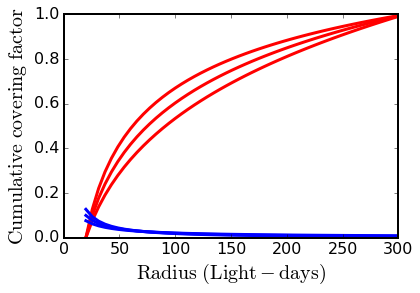

In [381]:
ltday=3e10*86400
print ltday
print np.log10(ltday*140)
#print 1.35e17/ltday

x=np.linspace(20,300)

for gamma in [-0.8,-1,-1.2]:
    y0=0
    yy=[]
    for i in range(len(x)):
        y= x[i]**gamma/np.sum(x**gamma)
        #plt.plot(x[i],y0,'r.')
        yy.append(y0)
        y0=y0+y
    plt.plot(x,yy,'r')

for gamma in [-0.8,-1,-1.2]:
    #for i in range(len(x)):
    y= x**gamma/np.sum(x**gamma)
    plt.plot(x,y,'b')
    
plt.xlabel(r'$\rm Radius\ (Light-days)$')
plt.ylabel(r'$\rm Cumulative\ covering\ factor$')

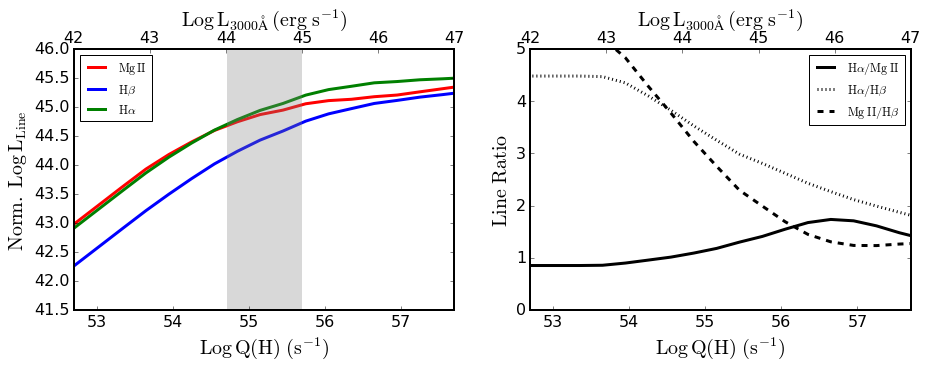

In [376]:

Lline_mgii=[]
Lline_ha=[]
Lline_hb=[]
QH=np.logspace(52.,58,100)
Rout = 17.8
for i in QH:
    qh=i
    R=np.sqrt(qh/12.56/10**np.arange(17,24.125,0.125))
    ind=np.where( (R < 10**Rout) ,True,False )
    Lline_mgii.append( (R[ind]**2*mgii_R[ind]).sum() )
    Lline_hb.append( (R[ind]**2*hb_R[ind]).sum() )
    Lline_ha.append( (R[ind]**2*ha_R[ind]).sum() )   
Lline_ha=np.array(Lline_ha)
Lline_mgii=np.array(Lline_mgii)
Lline_hb=np.array(Lline_hb)

sf=10.7 #0.7 is log10(5.15) 

for line in zip([Lline_mgii,Lline_hb,Lline_ha],['r','b','g']):
    means, bin_edges, binnumber = stats.binned_statistic(np.log10(QH)-sf,line[0], statistic='mean',bins=20)
    #plt.plot((bin_edges[:-1]+ bin_edges[1:])/2.,np.log10(means),line[1])
    w=(bin_edges[:-1]+ bin_edges[1:])/2.
    if line[1] == 'r':
        rf=np.asarray(means)
    if line[1] == 'b':
        bf=np.asarray(means)
    if line[1] == 'g':
        gf=np.asarray(means)



plt.figure(figsize=(15,5))
plt.subplots_adjust(top=0.85)
ax1=plt.subplot(121)
sf=10.7
plt.plot(w+sf,np.log10(rf),'r',label=r'$\rm Mg\,II$')
plt.plot(w+sf,np.log10(bf),'b',label=r'$\rm H\beta$')
plt.plot(w+sf,np.log10(gf),'g',label=r'$\rm H\alpha$')
plt.ylabel(r'$\rm Norm.\ Log\,L_{Line}$')
plt.text(0.05,0.9,'LOC',fontsize=20,transform=ax1.transAxes)
plt.legend(loc='best')
#plt.text(44.+sf,600,'Obs.',fontsize=20)
plt.axvline(x=44.5+sf, ymin=0,ymax=1000, linewidth=75, color='grey',alpha=0.3)
#plt.xlabel(r"$\rm L_{3000\AA}\, (erg\,\, s^{-1})$")
#plt.ylim(1.8,3.0)
plt.xlim(42+sf,47+sf)
#plt.ylim(41.5,44)
plt.xlabel(r'$\rm Log\, Q(H)\,\, (s^{-1})$')

ax2 = ax1.twiny()
ax2.set_xlim(42,47)
ax2.set_xlabel(r"$\rm Log\, L_{3000\AA}\, (erg\,\, s^{-1})$")


ax1=plt.subplot(122)
plt.plot(w+sf,gf/rf,'k',label=r'$\rm H\alpha/Mg\;II$')
plt.plot(w+sf,gf/bf,'k:',label=r'$\rm H\alpha/H\beta$')
plt.plot(w+sf,rf/bf,'k--',label=r'$\rm Mg\;II/H\beta$')

plt.axvline(x=sf, ymin=0,ymax=1000, linewidth=75, color='grey',alpha=0.3)
#plt.text(44.+sf,3.5,'Obs.',fontsize=20)
plt.xlabel(r'$\rm Log\, Q(H)\,\, (s^{-1})$')
#plt.xlabel(r"$\rm L_{3000\AA}\, (erg\,\, s^{-1})$")
plt.ylabel(r'$\rm Line\,\, Ratio$')
plt.xlim(42+sf,47+sf)
plt.legend(loc='best')
plt.ylim(0,5)
ax2 = ax1.twiny()
ax2.set_xlim(42,47)
ax2.set_xlabel(r"$\rm Log\,L_{3000\AA}\, (erg\,\, s^{-1})$")
#plt.savefig('/Users/legolason/Desktop/LOC/model_LOC.pdf')



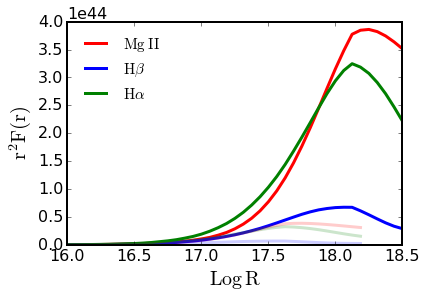

In [379]:
for ii in zip([3.e55,3.e54],[1,0.2]):
    QH=ii[0]
    R=np.sqrt(QH/12.56/10**np.arange(17,24.125,0.125))
    plt.plot(np.log10(R),(R**2*mgii_R),'r',alpha=ii[1])
    plt.plot(np.log10(R),(R**2*hb_R),'b',alpha=ii[1])
    plt.plot(np.log10(R),(R**2*ha_R),'g',alpha=ii[1])
plt.xlim(16,18.5)
plt.ylabel(r'$\rm \,r^2F(r)$')
plt.xlabel(r'$\rm Log\,R$')
plt.plot([Rout,Rout],[41,45],'k--')
#plt.plot([Rout+0.5,Rout+0.5],[0,10],'k--')
#plt.text(0.65,0.9,r'$\rm R_{out}$',rotation=90,fontsize=20,transform=ax2.transAxes)
#plt.text(0.1,0.9,r'$f(r)\,\, \propto \,\, r^{-1}$ ',fontsize=20,transform=ax2.transAxes)
#plt.ylim(41,45)

plt.plot([],[],'r',label=r'$\rm Mg\;II$')
plt.plot([],[],'b',label=r'$\rm H\beta$')
plt.plot([],[],'g',label=r'$\rm H\alpha$')
#plt.text(0.05,0.3,r'Bright -->',fontsize=15,transform=ax2.transAxes)
#plt.text(0.25,0.3,r'  Faint',fontsize=15,transform=ax2.transAxes,alpha=0.4)
plt.legend(loc=2,frameon=False,fontsize=15)

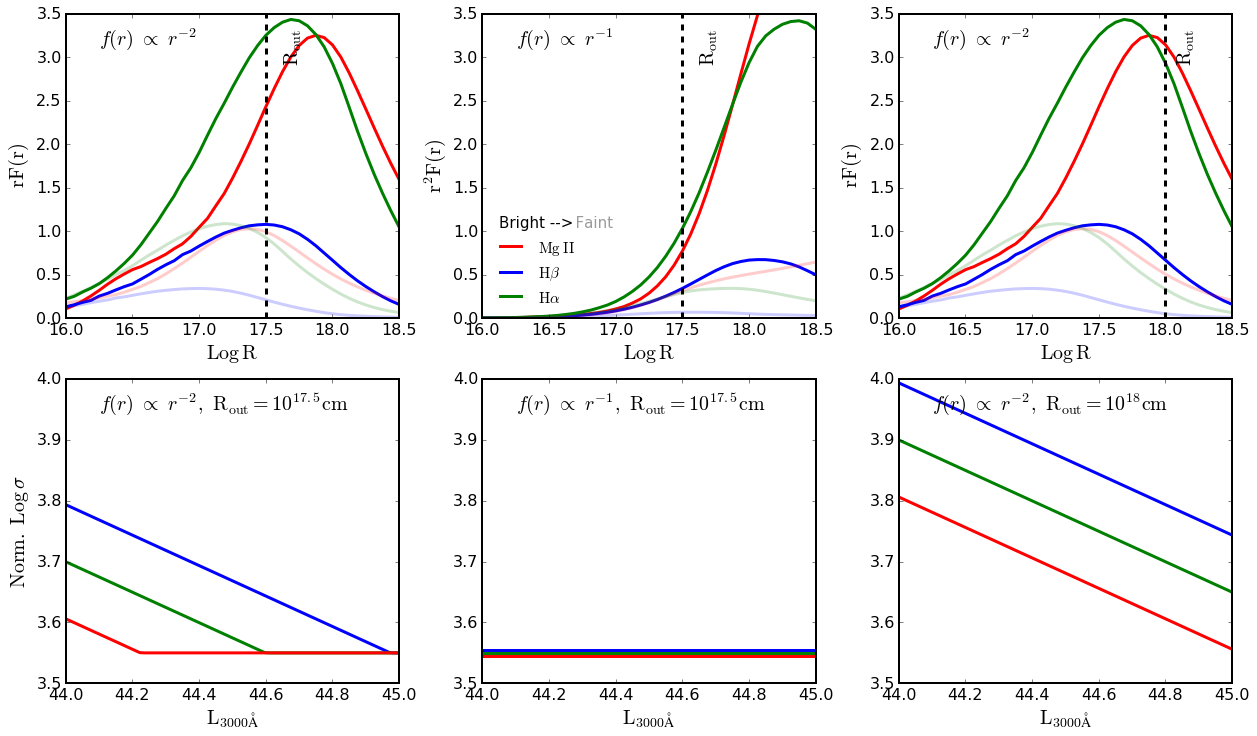

In [256]:


plt.figure(figsize=(18,12))
plt.subplots_adjust(wspace=0.25,left=0.05,right=0.95)

ax3=plt.subplot(231)
for ii in zip([3.e55,3.e54],[1,0.2]):
    rr=1.e26
    QH=ii[0]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    plt.plot(np.log10(R),(R**1.*mgii_R)/rr,'r',alpha=ii[1],label=r'$\rm Mg\;II$')
    plt.plot(np.log10(R),(R**1.*hb_R)/rr,'b',alpha=ii[1],label=r'$\rm H\beta$')
    plt.plot(np.log10(R),(R**1.*ha_R)/rr,'g',alpha=ii[1],label=r'$\rm H\alpha$')
plt.xlim(16,18.5)
plt.ylabel(r'$\rm \,rF(r)$')
plt.xlabel(r'$\rm Log\,R$')
plt.plot([Rout,Rout],[0,3.5],'k--')
#plt.plot([Rout+0.5,Rout+0.5],[0,3.5],'k--')
plt.text(0.65,0.9,r'$\rm R_{out}$',rotation=90,fontsize=20,transform=ax3.transAxes)
plt.text(0.1,0.9,r'$f(r)\,\, \propto \,\, r^{-2}$ ',fontsize=20,transform=ax3.transAxes)


ax2=plt.subplot(232)
for ii in zip([3.e55,3.e54],[1,0.2]):
    rr=1.e44
    QH=ii[0]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    plt.plot(np.log10(R),(R**2*mgii_R)/rr,'r',alpha=ii[1])
    plt.plot(np.log10(R),(R**2*hb_R)/rr,'b',alpha=ii[1])
    plt.plot(np.log10(R),(R**2*ha_R)/rr,'g',alpha=ii[1])
plt.xlim(16,18.5)
plt.ylabel(r'$\rm \,r^2F(r)$')
plt.xlabel(r'$\rm Log\,R$')
plt.plot([Rout,Rout],[0,4.],'k--')
#plt.plot([Rout+0.5,Rout+0.5],[0,10],'k--')
plt.text(0.65,0.9,r'$\rm R_{out}$',rotation=90,fontsize=20,transform=ax2.transAxes)
plt.text(0.1,0.9,r'$f(r)\,\, \propto \,\, r^{-1}$ ',fontsize=20,transform=ax2.transAxes)
plt.ylim(0,3.5)

plt.plot([],[],'r',label=r'$\rm Mg\;II$')
plt.plot([],[],'b',label=r'$\rm H\beta$')
plt.plot([],[],'g',label=r'$\rm H\alpha$')
plt.text(0.05,0.3,r'Bright -->',fontsize=15,transform=ax2.transAxes)
plt.text(0.25,0.3,r'  Faint',fontsize=15,transform=ax2.transAxes,alpha=0.4)
plt.legend(loc=3,frameon=False,fontsize=15)




ax3=plt.subplot(233)
for ii in zip([3.e55,3.e54],[1,0.2]):
    rr=1.e26
    QH=ii[0]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    plt.plot(np.log10(R),(R**1.*mgii_R)/rr,'r',alpha=ii[1],label=r'$\rm Mg\;II$')
    plt.plot(np.log10(R),(R**1.*hb_R)/rr,'b',alpha=ii[1],label=r'$\rm H\beta$')
    plt.plot(np.log10(R),(R**1.*ha_R)/rr,'g',alpha=ii[1],label=r'$\rm H\alpha$')
plt.xlim(16,18.5)
plt.ylabel(r'$\rm \,rF(r)$')
plt.xlabel(r'$\rm Log\,R$')
plt.plot([Rout+0.5,Rout+0.5],[0,3.5],'k--')
#plt.plot([Rout+0.5,Rout+0.5],[0,3.5],'k--')
plt.text(0.83,0.9,r'$\rm R_{out}$',rotation=90,fontsize=20,transform=ax3.transAxes)
plt.text(0.1,0.9,r'$f(r)\,\, \propto \,\, r^{-2}$ ',fontsize=20,transform=ax3.transAxes)


#--------------------
#plt.figure(figsize=(15,5))
ax=plt.subplot(234)
Lline_mgii=[]
Lline_ha=[]
Lline_hb=[]
mgii_Peak=[]
qq=[]
y1=[]
y2=[]
y3=[]
al=1

for i in range(73):
    QH=np.logspace(55.5,54.5,73)[i]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    mx=10**17.5
    
    hb_peak = R[(R**1.*hb_R).argmax()].clip(max =mx)
    ha_peak = R[(R**1.*ha_R).argmax()].clip(max =mx)
    mgii_peak = R[(R**1.*mgii_R).argmax()].clip(max =mx)
    fc=12.3
    #plt.plot(np.log10(QH)-10.5,np.log10(1./np.sqrt(hb_peak))+fc,'b.',alpha=al)
    #plt.plot(np.log10(QH)-10.5,np.log10(1./np.sqrt(ha_peak))+fc,'g.',alpha=al)
    #plt.plot(np.log10(QH)-10.5,np.log10(1./np.sqrt(mgii_peak))+fc,'r.',alpha=al)
    qq.append(np.log10(QH)-10.5)
    y1.append(np.log10(1./np.sqrt(hb_peak))+fc)
    y2.append(np.log10(1./np.sqrt(ha_peak))+fc)
    y3.append(np.log10(1./np.sqrt(mgii_peak))+fc)
plt.plot(qq,y1,'b',qq,y2,'g',qq,y3,'r',alpha=al)
plt.xlabel(r"$\rm L_{3000\AA}$")
plt.ylabel(r"$\rm Norm.\,\, Log\,\sigma$")
plt.ylim(3.5,4)
plt.xlim(44,45)
plt.text(0.1,0.9,r'$f(r)\,\, \propto \,\, r^{-2},$ $\rm R_{out}=10^{17.5}cm$',fontsize=20,transform=ax.transAxes)

ax=plt.subplot(235)
Lline_mgii=[]
Lline_ha=[]
Lline_hb=[]
mgii_Peak=[]
qq=[]
y1=[]
y2=[]
y3=[]
for i in range(73):
    QH=np.logspace(55.5,54.5,73)[i]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    mx=10**17.5
    hb_peak = R[(R**2.*hb_R).argmax()].clip(max =mx)
    ha_peak = R[(R**2.*ha_R).argmax()].clip(max =mx)
    mgii_peak = R[(R**2.*mgii_R).argmax()].clip(max =mx)
    fc=12.3
    qq.append(np.log10(QH)-10.5)
    y1.append(np.log10(1./np.sqrt(hb_peak))+fc+0.005)
    y2.append(np.log10(1./np.sqrt(ha_peak))+fc)
    y3.append(np.log10(1./np.sqrt(mgii_peak))+fc-0.005)
plt.plot(qq,y1,'b',qq,y2,'g',qq,y3,'r',alpha=al)
plt.xlabel(r"$\rm L_{3000\AA}$")
plt.ylim(3.5,4)
plt.xlim(44,45)
plt.text(0.1,0.9,r'$f(r)\,\, \propto \,\, r^{-1},$ $\rm R_{out}=10^{17.5}cm$',fontsize=20,transform=ax.transAxes)

ax=plt.subplot(236)
Lline_mgii=[]
Lline_ha=[]
Lline_hb=[]
mgii_Peak=[]
qq=[]
y1=[]
y2=[]
y3=[]
for i in range(73):
    QH=np.logspace(55.5,54.5,73)[i]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    mx=10**18
    hb_peak = R[(R**1.*hb_R).argmax()].clip(max =mx)
    ha_peak = R[(R**1.*ha_R).argmax()].clip(max =mx)
    mgii_peak = R[(R**1.*mgii_R).argmax()].clip(max =mx)
    fc=12.5
    qq.append(np.log10(QH)-10.5)
    y1.append(np.log10(1./np.sqrt(hb_peak))+fc)
    y2.append(np.log10(1./np.sqrt(ha_peak))+fc)
    y3.append(np.log10(1./np.sqrt(mgii_peak))+fc)
plt.plot(qq,y1,'b',qq,y2,'g',qq,y3,'r',alpha=al)
plt.xlabel(r"$\rm L_{3000\AA}$")    
plt.ylim(3.5,4)
plt.xlim(44,45)
plt.text(0.1,0.9,r'$f(r)\,\, \propto \,\, r^{-2},$ $\rm R_{out}=10^{18}cm$',fontsize=20,transform=ax.transAxes)
#plt.savefig('/Users/legolason/Desktop/emissivity.pdf')